Reference notebook: www.learnpytorch.io/_pytorch_fundamentals/



In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.3.0+cu121


In [2]:
from torch import nn

In [3]:
weight = .7
bias = .3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  plt.legend(prop={'size': 14})

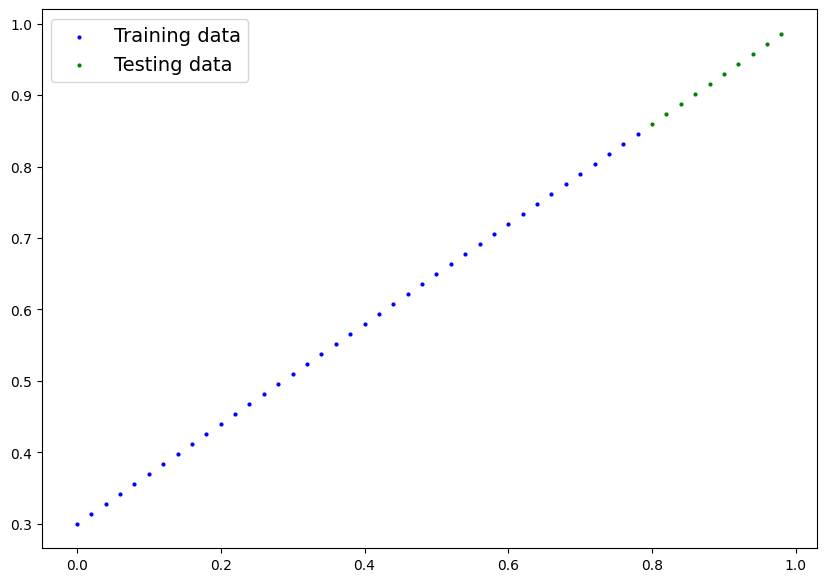

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [32]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

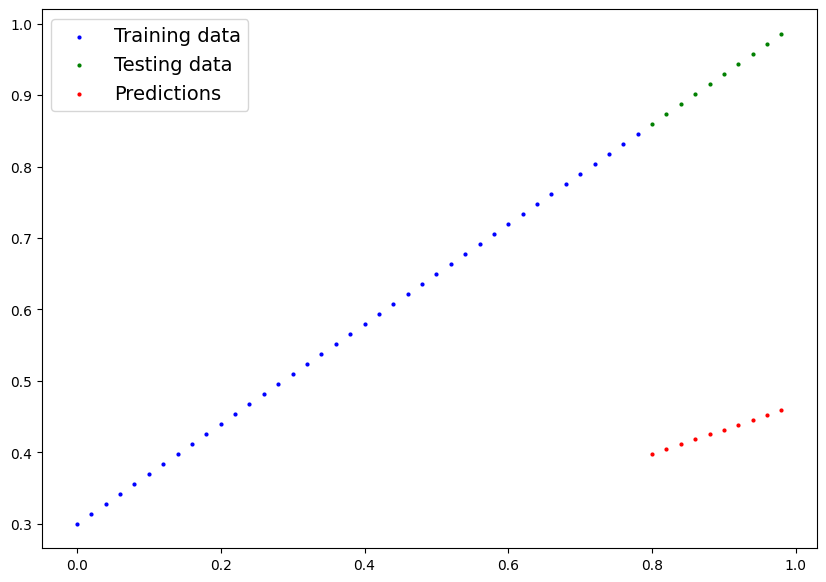

In [34]:
plot_predictions(predictions=y_preds)

In [35]:
loss_fn = nn.L1Loss()

loss = loss_fn(y_preds, y_test)

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [36]:
epochs = 500

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train() # makes all parameters that require gradients require gradients
  model_0.eval() # turn off gradient tracking

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad() # start fresh each time a gradient is computed
  loss.backward()
  optimizer.step()
  #Testing
  model_0.eval() #turns off different settings in the model that aren't necessary for evaluation or testing
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
Epoch: 10 | Loss: 0.3013603389263153 | Test loss: 0.4797181189060211
Epoch: 20 | Loss: 0.28983938694000244 | Test loss: 0.4662471413612366
Epoch: 30 | Loss: 0.2783183455467224 | Test loss: 0.4527761936187744
Epoch: 40 | Loss: 0.26679736375808716 | Test loss: 0.43930521607398987
Epoch: 50 | Loss: 0.2552763819694519 | Test loss: 0.4258342385292053
Epoch: 60 | Loss: 0.24375538527965546 | Test loss: 0.41236335039138794
Epoch: 70 | Loss: 0.232234388589859 | Test loss: 0.398892343044281
Epoch: 80 | Loss: 0.22071340680122375 | Test loss: 0.38542139530181885
Epoch: 90 | Loss: 0.2091923952102661 | Test loss: 0.3719504475593567
Epoch: 100 | Loss: 0.19767141342163086 | Test loss: 0.35847947001457214
Epoch: 110 | Loss: 0.18615040183067322 | Test loss: 0.34500852227211
Epoch: 120 | Loss: 0.17462942004203796 | Test loss: 0.33153754472732544
Epoch: 130 | Loss: 0.16310855746269226 | Test loss: 0.3180667459964752
Epoch: 140 | Loss: 0.

In [37]:
loss, model_0.state_dict()

(tensor(0.0416, grad_fn=<MeanBackward0>),
 OrderedDict([('weights', tensor([0.4922])), ('bias', tensor([0.3840]))]))

In [38]:
with torch.inference_mode():
  y_preds = model_0(X_test)

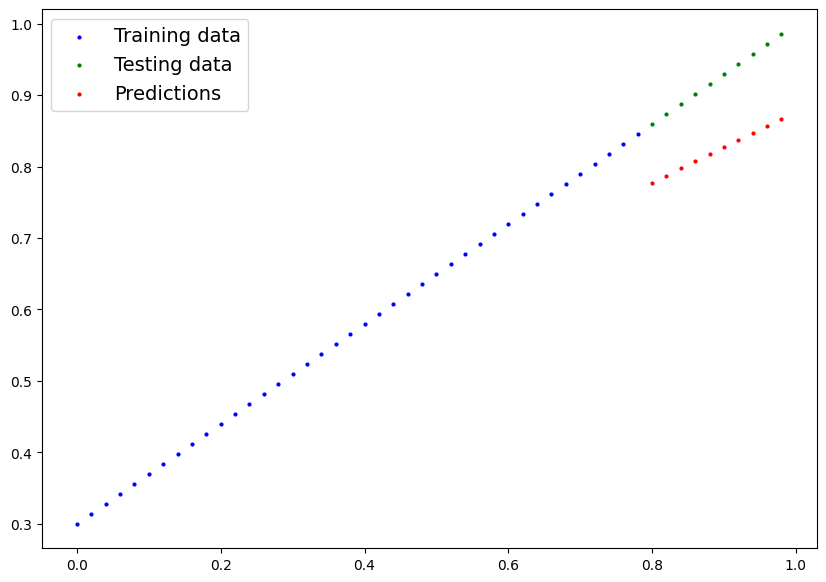

In [39]:
plot_predictions(predictions=y_preds)

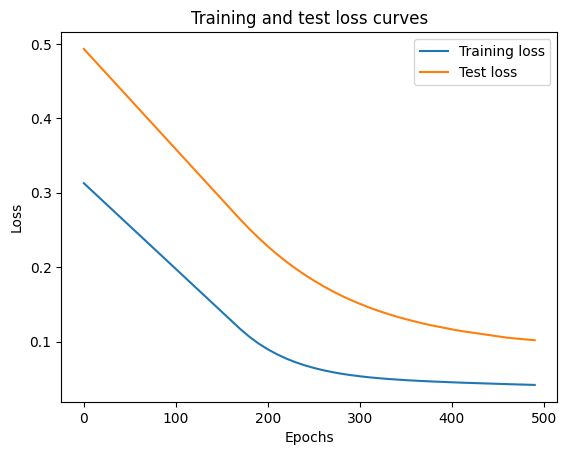

In [41]:
plt.plot(torch.tensor(epoch_count).numpy(), torch.tensor(loss_values).numpy(), label='Training loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [42]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [43]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4922])), ('bias', tensor([0.3840]))])

In [51]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

class ModelCopy(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = ModelCopy()
train_data = torch.arange(0, 1, .02).unsqueeze(dim=1)
train_X, test_X = train_data[:int(.8*len(train_data))], train_data[int(len(train_data)*.8):]
train_Y = .7 * train_X + .3
test_Y = .7 * test_X + .3
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [53]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=.01)
for epoch in range(100):
  model_1.train()
  pred = model_1(train_X)
  loss = loss_fn(pred, train_Y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.inference_mode():
    model_1.eval()
    test_pred = model_1(test_X)
    test_loss = loss_fn(test_pred, test_Y)
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6707]])),
             ('linear_layer.bias', tensor([0.3120]))])